## Gerekli Kütüphanelerin Yüklenmesi
* Sayısal işlemler ve matris hesaplamaları için **Numpy**, veri seti yükleme, düzenleme ve analiz etmede **Pandas** kullandım.
* Veri setini eğitim ve test seti olarak ayırmak için de **train_test_split** kullandım.
* **K-En Yakın Komşu (KNN)** algoritmasını sınıflandırma problemi kullanmak amacıyla kullandım.
* Çoklu Doğrusal Regresyon modelinin oluşturulması için **LinearRegression** kullandım.
* Verilerin standartlaştırılması için **StandardScaler** kullandım.
* Model performansını değerlendirmek için ise şu ikisini kullandım ; **confusion_matrix = Modelin tahminlerini gerçek etiketlerle karşılaştırır ve bir hata matrisi döndürür.** , **classification_report = Doğruluk , hatırlama (recall) , F1 skoru gibi metrikleri özetler.**
* Regresyon modellerinin başarımını değerlendirmek için **mean_squared_error** ve **r2_score** kullandım.
* Verilerin estetik görselleştirilmesinde **seaborn** kullandım.
* Grafiklerin oluşturulması ve görselleştirilmesinde **matplotlib.pyplot** kullandım.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Verileri yükleme işlemi

In [4]:
data = pd.read_csv("machine.data", header=None)
data.columns = ["Vendor", "Model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]

## ERP sütunu mevcut değilse, kaldırma işlemini atla

In [6]:
if "ERP" in data.columns:
    data = data.drop(columns=["ERP"])

## Bağımsız ve bağımlı değişkenleri ayır

In [8]:
X = data.iloc[:, 2:-1]  # Bağımsız değişkenler
y = data["PRP"]         # Bağımlı değişken (PRP)

## PRP değerlerini sınıflara ayır

In [10]:
bins = [0, 100, 200, np.inf]
labels = ["Low", "Medium", "High"]
y_class = pd.cut(y, bins=bins, labels=labels)

## Veri ölçeklendirme sürecidir

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Veri setini eğitim ve test olarak böl

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

## KNN sınıflandırma modelini oluştur ve eğit

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train_class)

KNeighborsClassifier()

## Test verisi üzerinde tahmin yap

In [18]:
y_pred_knn = knn_classifier.predict(X_test)

## KNN için sınıflandırma raporu ve karmaşıklık matrisi 

KNN Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         8
         Low       0.94      0.97      0.95        31
      Medium       0.50      0.33      0.40         3

    accuracy                           0.93        42
   macro avg       0.81      0.77      0.78        42
weighted avg       0.92      0.93      0.92        42



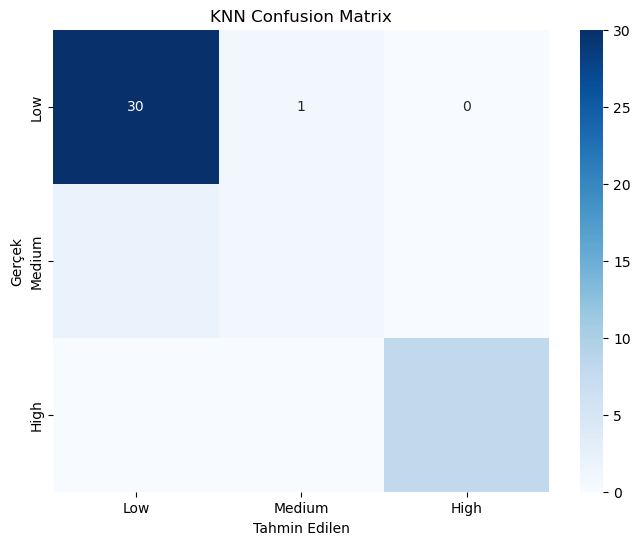

In [20]:
print("KNN Classification Report:")
print(classification_report(y_test_class, y_pred_knn))

cm_knn = confusion_matrix(y_test_class, y_pred_knn, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("KNN Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

## Çoklu Doğrusal Regresyon

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Regresyon Tahminleri

In [24]:
y_pred_reg = regressor.predict(X_test)

## Regresyon Performans Metrikleri

In [26]:
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R^2: {r2:.2f}")

Linear Regression MSE: 5633.07
Linear Regression R^2: 0.89


## Gerçek ve Tahmin Edilen Değerler (Tek Panel Üzerinden)

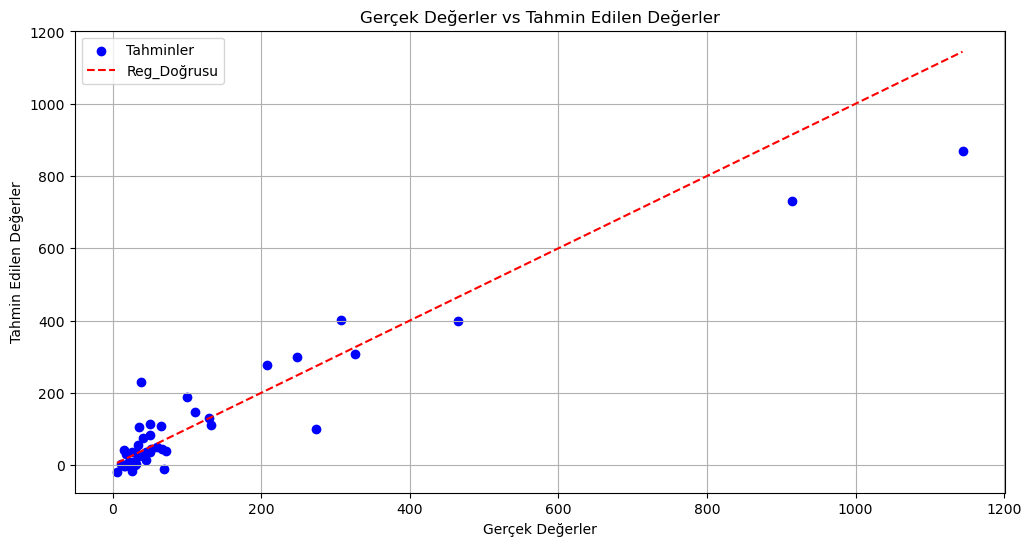

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_reg, color='blue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Reg_Doğrusu')
plt.title("Gerçek Değerler vs Tahmin Edilen Değerler")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.legend()
plt.grid(True)
plt.show()

## Gerçek ve Tahmin Edilen Değerler (Çift Panel)

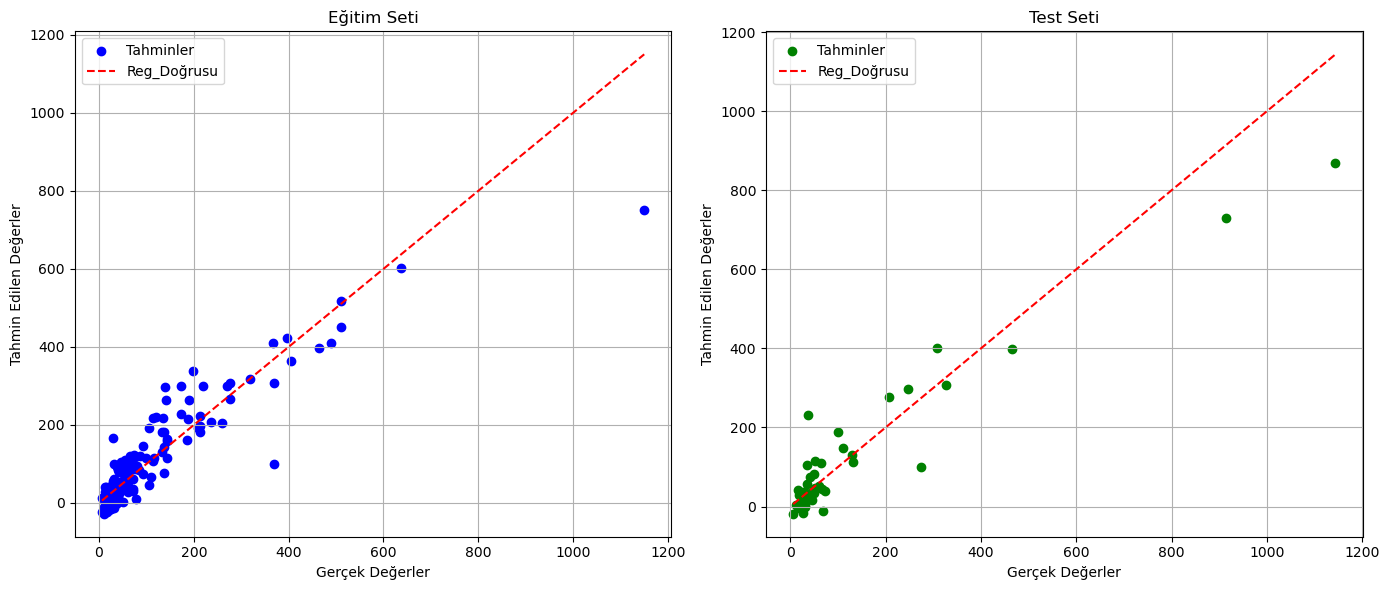

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Sol Panel: Eğitim Seti
axs[0].scatter(y_train, regressor.predict(X_train), color='blue', label='Tahminler')
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Reg_Doğrusu')
axs[0].set_title("Eğitim Seti")
axs[0].set_xlabel("Gerçek Değerler")
axs[0].set_ylabel("Tahmin Edilen Değerler")
axs[0].legend()
axs[0].grid(True)

# Sağ Panel: Test Seti
axs[1].scatter(y_test, y_pred_reg, color='green', label='Tahminler')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Reg_Doğrusu')
axs[1].set_title("Test Seti")
axs[1].set_xlabel("Gerçek Değerler")
axs[1].set_ylabel("Tahmin Edilen Değerler")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()